<a href="https://colab.research.google.com/github/Sophiat-O/c02_emission_analysis/blob/test/Data_Analysis_of_Car_C02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.decomposition import PCA

In [2]:
#download dataset and convert to pandas dataframe for exploration

df = pd.read_csv("https://www.nrcan.gc.ca/sites/nrcan/files/oee/files/csv/MY2021%20Fuel%20Consumption%20Ratings.csv", header=[0, 1], encoding="latin-1")
df = df.dropna(subset=[("Model", "Unnamed: 2_level_1")]).dropna(axis=1)

df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Model,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel,Fuel Consumption,Unnamed: 9_level_0,Unnamed: 10_level_0,Unnamed: 11_level_0,CO2 Emissions,CO2,Smog
,Year,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,(L),Unnamed: 5_level_1,Unnamed: 6_level_1,Type,City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),(g/km),Rating,Rating
0,2021,Acura,ILX,Compact,2.4,4.0,AM8,Z,9.9,7.0,8.6,33.0,199.0,6.0,3.0
1,2021,Acura,NSX,Two-seater,3.5,6.0,AM9,Z,11.1,10.8,11.0,26.0,256.0,4.0,3.0
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4.0,AS10,Z,11.0,8.6,9.9,29.0,232.0,5.0,6.0
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4.0,AS10,Z,11.3,9.1,10.3,27.0,242.0,5.0,6.0
4,2021,Acura,TLX SH-AWD,Compact,2.0,4.0,AS10,Z,11.2,8.0,9.8,29.0,230.0,5.0,7.0


In [3]:
#rename columns
df.columns = [
  "year", "brand", "model", "vehicle_class", "engine_size", "cylinders", "transmission", "fuel_type", "fuel_consumption", "Hwy", "Comb", "Comb_mpg", "co2_emissions", "co2_rating", "smog_rating"
]

In [4]:
brand = df['brand']

In [5]:
#value count for all the car brands in the dataset
brand.value_counts()

Ford             87
Chevrolet        84
Mercedes-Benz    72
Porsche          63
GMC              61
BMW              54
Toyota           49
Audi             43
Jeep             36
Mazda            29
Hyundai          27
Lexus            27
Kia              25
Honda            23
MINI             22
Cadillac         22
Dodge            22
Nissan           22
Subaru           16
Ram              16
Volkswagen       16
Volvo            13
Maserati         11
Rolls-Royce      10
Buick             9
Lamborghini       9
Genesis           8
Bentley           8
Lincoln           7
Jaguar            6
Acura             6
Chrysler          6
Aston Martin      6
Alfa Romeo        6
Infiniti          6
Mitsubishi        5
Bugatti           2
FIAT              1
Name: brand, dtype: int64

In [6]:
#Replace fuel type enum with full name

df['fuel_type'] = df['fuel_type'].str.replace("Z", "Premium Gasoline")
df['fuel_type'] = df['fuel_type'].str.replace("X", "Regular Gasoline")
df['fuel_type'] = df['fuel_type'].str.replace("D", "Diesel")
df['fuel_type'] = df['fuel_type'].str.replace("E", "Ethanol(E85)")
df['fuel_type'] = df['fuel_type'].str.replace("N", "Natural Gas")

In [7]:
# df['fuel_type'].replace({
#     "Z": "Premium Gasoline",
#     "X": "Regular Gasoline",
#     ...
# })

In [8]:
#get the percentage of each fuel type by brand 

dd = df.groupby(["brand", "fuel_type"]).agg({"year": "count"})
dd['percent'] = dd.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
dd = dd.reset_index()
dd

,brand,fuel_type,year,percent
0,Acura,Premium Gasoline,6,1.00
1,Alfa Romeo,Premium Gasoline,6,1.00
2,Aston Martin,Premium Gasoline,6,1.00
3,Audi,Premium Gasoline,39,0.91
4,Audi,Regular Gasoline,4,0.09
...,...,...,...,...
60,Toyota,Regular Gasoline,47,0.96
61,Volkswagen,Premium Gasoline,1,0.06
62,Volkswagen,Regular Gasoline,15,0.94
63,Volvo,Premium Gasoline,12,0.92


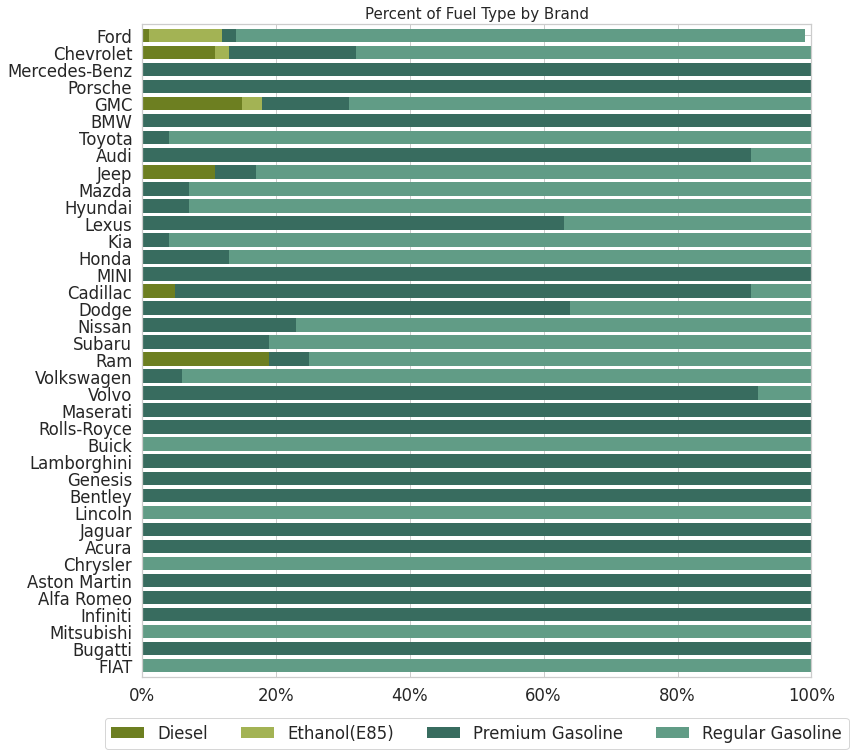

In [9]:
sns.set(font_scale=1.5, rc={"figure.figsize": (12, 12)}, style="whitegrid")

df_chart = dd.pivot(index="brand", columns="fuel_type", values="percent")
df_chart = df_chart.reindex(brand.value_counts().index, axis=0)
g = df_chart.plot.barh(stacked=True, lw=0, width=0.8, color=["#6D7F21","#A3B354","#386C5F","#619C86"])
g.invert_yaxis()
g.set_xticklabels([f"{int(x * 100)}%" for x in g.get_xticks()])
plt.margins(x=0)
plt.title("Percent of Fuel Type by Brand", fontsize=15)

g.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=4)

In [10]:
#Clean up transmission data by replacing the interger with string enum
df['transmission'] = df['transmission'].str.replace('\d+', '')

#replace transmission string enum with full name
df["transmission"] = np.where(df["transmission"]=="A", "Automatic", df["transmission"])
df["transmission"] = np.where(df["transmission"]=="AM", "Automated Manual", df["transmission"])
df["transmission"] = np.where(df["transmission"]=="AS", "Automatic with Select Shift", df["transmission"])
df["transmission"] = np.where(df["transmission"]=="AV", "Continuously Variable", df["transmission"])
df["transmission"] = np.where(df["transmission"]=="M", "Manual", df["transmission"])



In [11]:
#calculating the percentage transimission type by brand 

tr = df.groupby(["brand", "transmission"]).agg({"year": "count"})
tr['percent'] = tr.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
tr = tr.reset_index()
tr

,brand,transmission,year,percent
0,Acura,Automated Manual,2,0.33
1,Acura,Automatic with Select Shift,4,0.67
2,Alfa Romeo,Automatic,6,1.00
3,Aston Martin,Automatic,5,0.83
4,Aston Martin,Manual,1,0.17
...,...,...,...,...
79,Toyota,Manual,6,0.12
80,Volkswagen,Automated Manual,2,0.12
81,Volkswagen,Automatic with Select Shift,10,0.62
82,Volkswagen,Manual,4,0.25


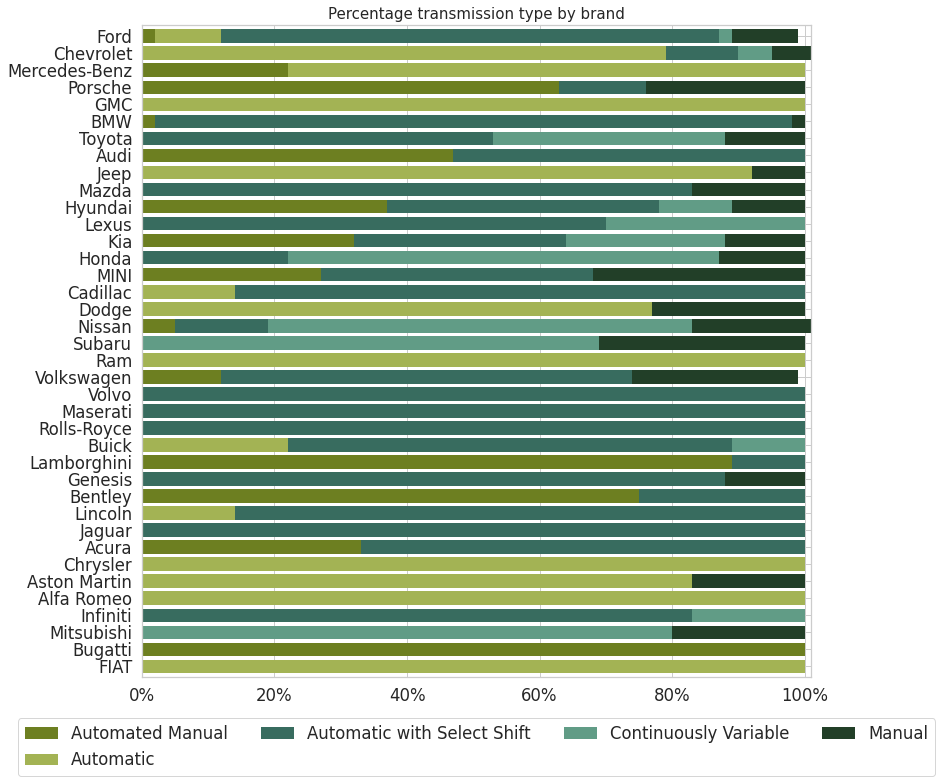

In [12]:
sns.set(font_scale=1.5, rc={"figure.figsize": (12, 12)}, style="whitegrid")

tr_chart = tr.pivot(index="brand", columns="transmission", values="percent")
tr_chart = tr_chart.reindex(brand.value_counts().index, axis=0)
g = tr_chart.plot.barh(stacked=True, lw=0, width=0.8, color=["#6D7F21","#A3B354","#386C5F","#619C86","#223F28"])
g.invert_yaxis()
g.set_xticklabels([f"{int(x * 100)}%" for x in g.get_xticks()])
plt.title("Percentage transmission type by brand", fontsize=15)
plt.margins(x=0)

g.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=4)

Text(0.5, 1.0, 'Brand Count')

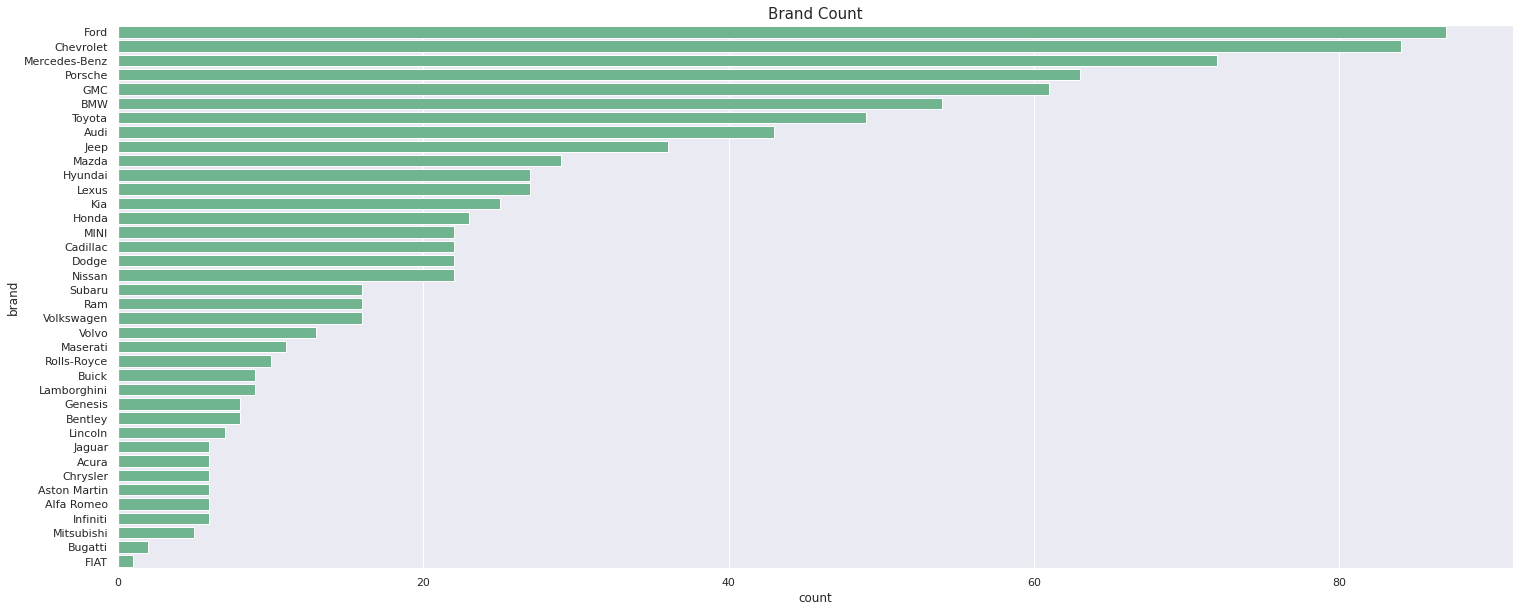

In [13]:
sns.set(rc = {'figure.figsize':(25,10)})
sns.countplot(y="brand", data=df, color="#65BF8F",order = brand.value_counts().index)
plt.title("Brand Count", fontsize=15)

transmission
Automatic with Select Shift    362
Automatic                      282
Automated Manual               124
Continuously Variable           86
Manual                          81
Name: transmission, dtype: int64


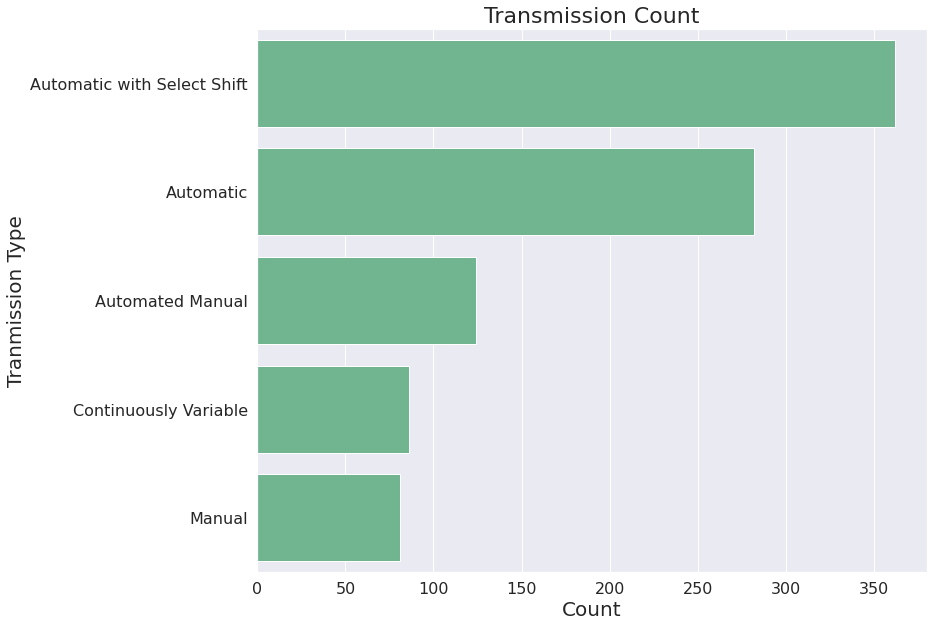

In [32]:
sns.set(rc = {'figure.figsize':(12,10)})
tr_count = df.groupby("transmission")["transmission"].count().sort_values(ascending=False)
#tr_count.plot(kind="bar", color="#65BF8F")
sns.countplot(y=df["transmission"], data=df, color="#65BF8F",order = df["transmission"].value_counts().index)
plt.title("Transmission Count", fontsize=22)
plt.ylabel("Tranmission Type", fontsize=20)
plt.xlabel("Count", fontsize=20)
plt.xticks(horizontalalignment='center', fontsize=16)
plt.yticks(fontsize=16)
print(tr_count)
plt.show()

fuel_type
Regular Gasoline    456
Premium Gasoline    438
Diesel               27
Ethanol(E85)         14
Name: fuel_type, dtype: int64


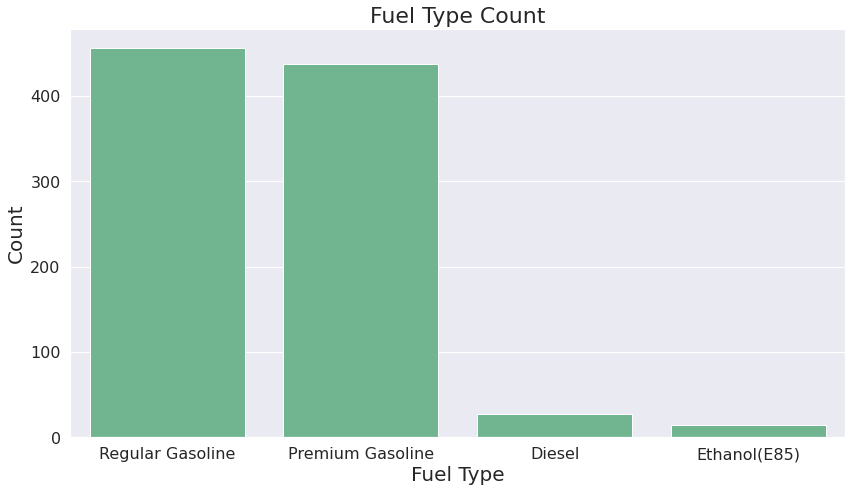

In [33]:
sns.set(rc = {'figure.figsize':(12,7)})
ft_count = df.groupby("fuel_type")["fuel_type"].count().sort_values(ascending=False)
#ft_count.plot(kind="bar", color="#65BF8F")
sns.countplot(x=df["fuel_type"], data=df, color="#65BF8F",order = df["fuel_type"].value_counts().index)
plt.title("Fuel Type Count", fontsize=22)
plt.ylabel("Count", fontsize=20)
plt.xlabel("Fuel Type", fontsize=20)
plt.xticks(horizontalalignment='center', fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
print(ft_count)
plt.show()

Text(0, 0.5, 'Transmission')

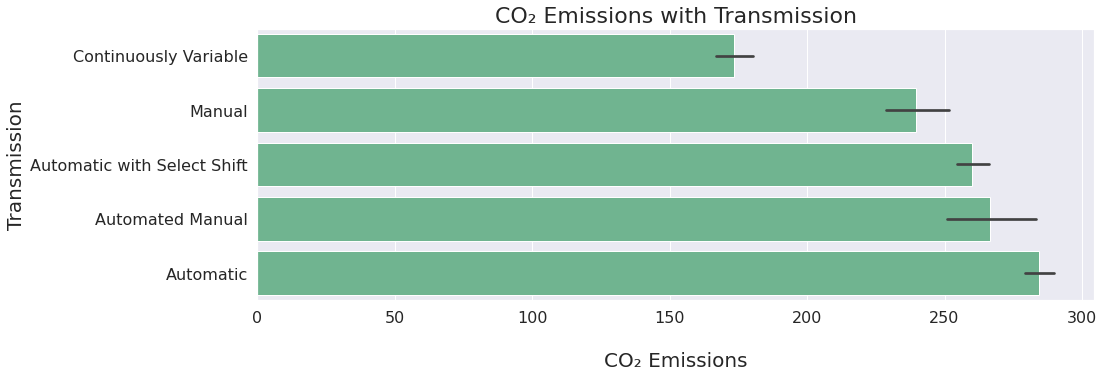

In [16]:
emission_transmission = df.groupby(["transmission"])["co2_emissions"].mean().sort_values().reset_index()

sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(y = "transmission",x="co2_emissions", data = df, color="#65BF8F", order = list(emission_transmission["transmission"])) #  palette=sns.light_palette("seagreen", reverse=True) color="#24D139",
plt.title('CO₂ Emissions with Transmission', fontsize=22)
plt.xlabel('\nCO₂ Emissions', fontsize=20)
plt.xticks(horizontalalignment='center', fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Transmission', fontsize=20)

From the bar plot we can see that the automatic transmission type has higher C02 emission.

Text(0, 0.5, 'CO₂ Emissions')

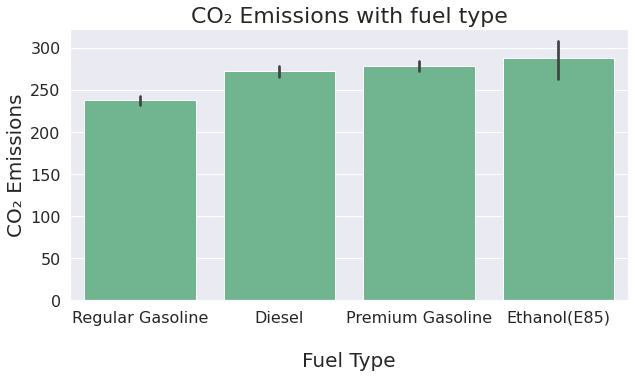

In [34]:
emission_fuel = df.groupby(["fuel_type"])["co2_emissions"].mean().sort_values().reset_index()

sns.set(rc = {'figure.figsize':(10,5)})
sns.barplot(x = "fuel_type",y="co2_emissions", order=list(emission_fuel["fuel_type"]), color="#65BF8F", data = df) # palette=sns.dark_palette("seagreen", reverse=True)
plt.title('CO₂ Emissions with fuel type', fontsize=22)
plt.xlabel('\nFuel Type', fontsize=20)
plt.xticks(horizontalalignment='center', fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('CO₂ Emissions', fontsize=20)

This chart shows Ethanol(E85) has the highest CO₂ Emissions. However we can also tell that there is no significant difference between Ethanol(E85) and Premuim Gasoline and also no significant difference betwwen Ethano(E85) and Diesel

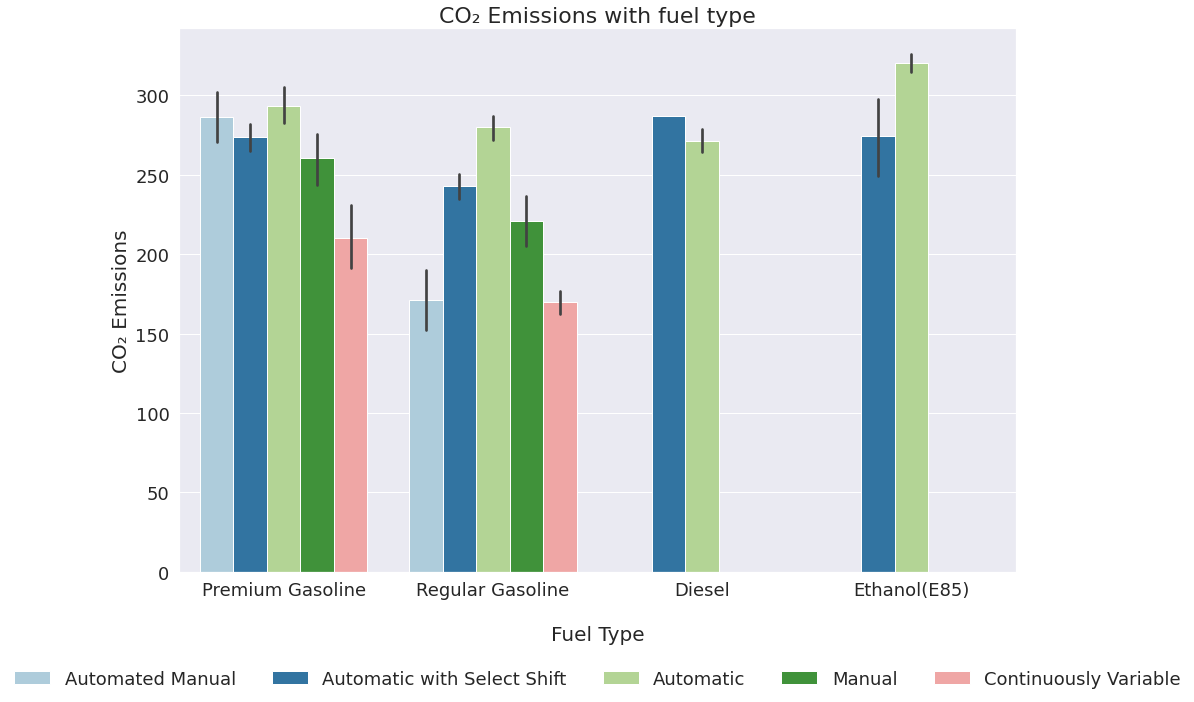

In [18]:
emission_fuel = df.groupby(["fuel_type"])["co2_emissions"].mean().sort_values().reset_index()

sns.set(rc = {'figure.figsize':(15,10)})
g = sns.barplot(x = "fuel_type",y="co2_emissions", hue="transmission", data = df,palette="Paired")
            # palette=sns.dark_palette("seagreen", reverse=True)
plt.title('CO₂ Emissions with fuel type', fontsize=22)
plt.xlabel('\nFuel Type', fontsize=20)
plt.xticks(horizontalalignment='center', fontsize = 18)
plt.ylabel('CO₂ Emissions', fontsize=20)
plt.yticks(fontsize = 18)

g.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=18, frameon=False, fancybox=False, shadow=False)

The ethanol(E85) fuel type has the highest C02 emission followed closey by premium gasoline

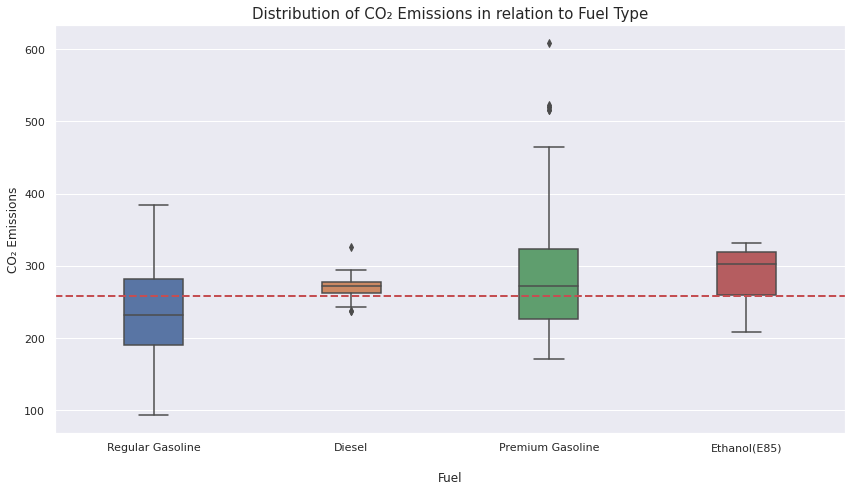

In [19]:
sns.set(rc = {'figure.figsize':(12,7)})
ft_distribution = df.groupby("fuel_type")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="fuel_type", y="co2_emissions", data=df, order=ft_distribution, width=0.3)
plt.title("Distribution of CO₂ Emissions in relation to Fuel Type", fontsize=15)
plt.xticks(horizontalalignment='center')
plt.xlabel("\nFuel", fontsize=12)
plt.ylabel("CO₂ Emissions", fontsize=12)
plt.axhline(df["co2_emissions"].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

From this boxplot the Ethanol(E85) is not just the fuel type with the highest C02 emission, it emits C02 that is way above the mean C02 emited in this dataset

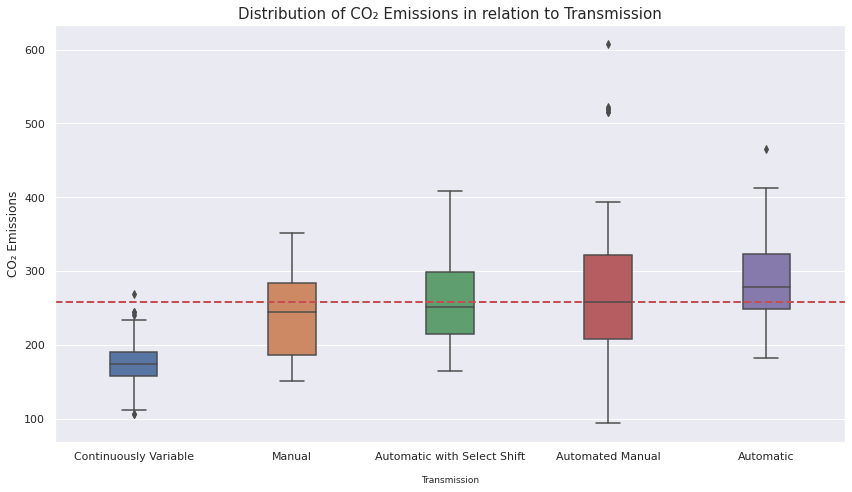

In [20]:
sns.set(rc = {'figure.figsize':(12,7)})
ft_distribution = df.groupby("transmission")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="transmission", y="co2_emissions", data=df, order=ft_distribution, width=0.3)
plt.title("Distribution of CO₂ Emissions in relation to Transmission", fontsize=15)
plt.xticks(horizontalalignment='center')
plt.xlabel("\nTransmission", fontsize=9)
plt.ylabel("CO₂ Emissions", fontsize=12)
plt.axhline(df["co2_emissions"].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

More than 50% of cars with automatic transmission enits above the median C02 emission while 50% of Automated Manual cars emits above the mean C02 emission.

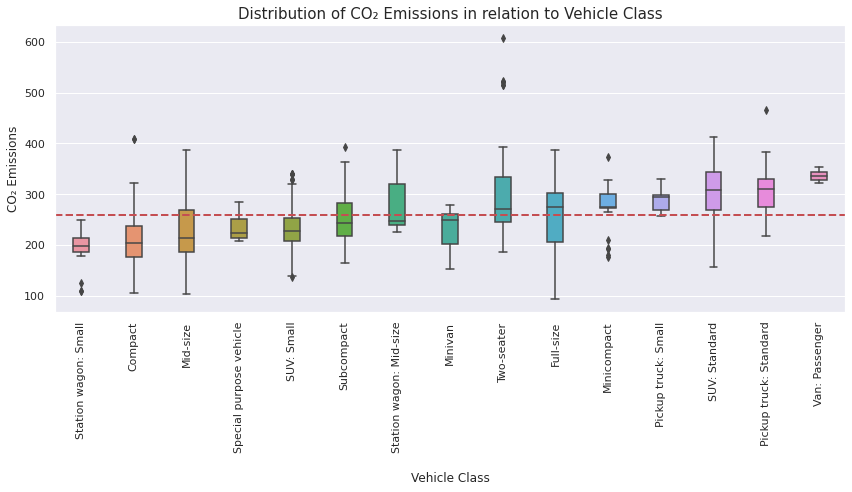

In [21]:
sns.set(rc = {'figure.figsize':(12,7)})
ft_distribution = df.groupby("vehicle_class")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="vehicle_class", y="co2_emissions", data=df, order=ft_distribution, width=0.3)
plt.title("Distribution of CO₂ Emissions in relation to Vehicle Class", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("\nVehicle Class", fontsize=12)
plt.ylabel("CO₂ Emissions", fontsize=12)
plt.axhline(df["co2_emissions"].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

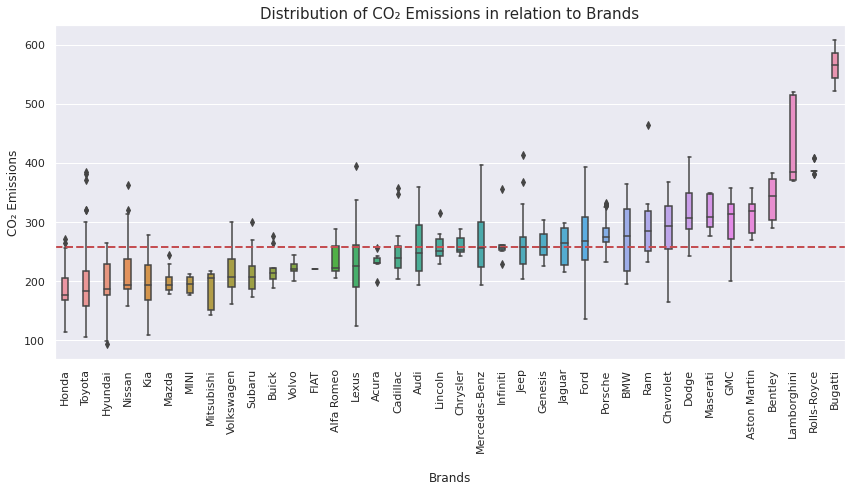

In [22]:
sns.set(rc = {'figure.figsize':(12,7)})
ft_distribution = df.groupby("brand")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="brand", y="co2_emissions", data=df, order=ft_distribution, width=0.3)
plt.title("Distribution of CO₂ Emissions in relation to Brands", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("\nBrands", fontsize=12)
plt.ylabel("CO₂ Emissions", fontsize=12)
plt.axhline(df["co2_emissions"].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

From our previous analysis of fuel type by brand and transmission type by brand we can see that the Bugatti cars in the dataset use premium gasoline and are of the transmission type automated manual and they both emit high CO₂

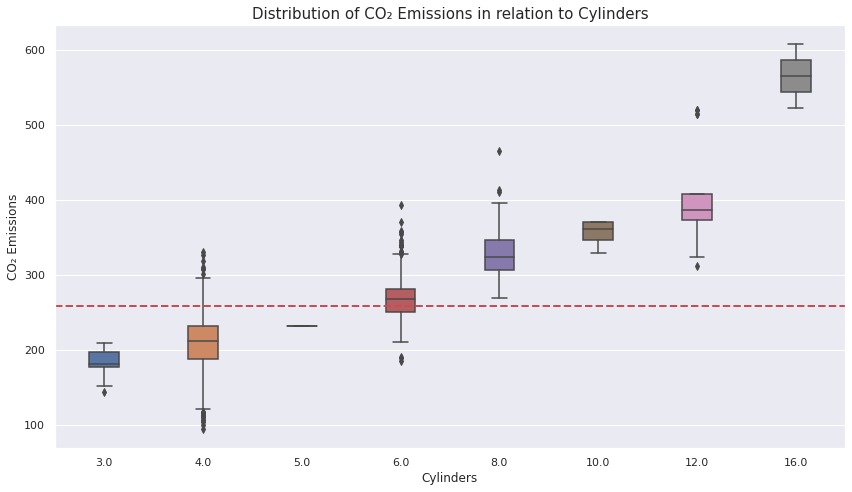

In [23]:
sns.set(rc = {'figure.figsize':(12,7)})
ft_distribution = df.groupby("cylinders")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="cylinders", y="co2_emissions", data=df, order=ft_distribution, width=0.3)
plt.title("Distribution of CO₂ Emissions in relation to Cylinders", fontsize=15)
plt.xticks(horizontalalignment='center')
plt.xlabel("Cylinders", fontsize=12)
plt.ylabel("CO₂ Emissions", fontsize=12)
plt.axhline(df["co2_emissions"].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

The cylinder is positively correlated to the C02 emission an increase in the cylinder shows an increase in the C02 emission

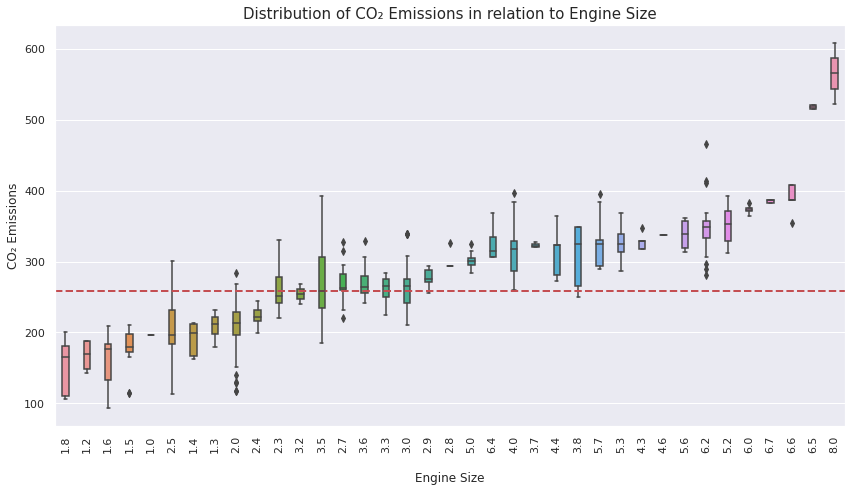

In [24]:
sns.set(rc = {'figure.figsize':(12,7)})
ft_distribution = df.groupby("engine_size")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="engine_size", y="co2_emissions", data=df, order=ft_distribution, width=0.3)
plt.title("Distribution of CO₂ Emissions in relation to Engine Size", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("\nEngine Size", fontsize=12)
plt.ylabel("CO₂ Emissions", fontsize=12)
plt.axhline(df["co2_emissions"].mean(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

The engine size is also positively correlated to the C02 emission, an increase in the engine size shows an increase in the C02 emission